In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("./Data/GlobalLandTemperaturesByCity.csv")
df = df.dropna()

In [4]:
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [5]:
df1 = df.loc[df['City'] == "New York"]

In [6]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5203973,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
5203978,1744-04-01,9.788,2.151,New York,United States,40.99N,74.56W
5203979,1744-05-01,15.708,1.506,New York,United States,40.99N,74.56W
5203980,1744-06-01,21.210,1.455,New York,United States,40.99N,74.56W
5203981,1744-07-01,22.207,1.305,New York,United States,40.99N,74.56W


In [7]:
df1.size

21833

In [8]:
# choose only say china
data = list(df1.iloc[:,1])

In [9]:
mean = np.mean(np.array(data))
std = np.std(np.array(data))

In [10]:
data1 = (np.array(data) - mean)/std

In [11]:
X = []
Y = []
for i in range(0, len(list(data))-60):# 60 -> 70 if predicting for 20
    X.append(data1[i:i+50])
    Y.append(data1[i+50:i+60])# 60 -> 70 if predicting for 20

In [12]:
X_1 = np.array(X)
Y_1 = np.array(Y)

In [13]:
X_2 = X_1.reshape(X_1.shape[0],50,1)
Y_2 = Y_1.reshape(Y_1.shape[0], 10)# 10 -> 20 if predicting for 20

In [14]:
Y_2.shape

(3059, 10)

In [15]:
n = int(0.1*len(X))
X_train = X_2[:-n]
Y_train = Y_2[:-n]
X_test = X_2[-n:]
Y_test = Y_2[-n:]

In [16]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2754, 50, 1) (2754, 10) (305, 50, 1) (305, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

/Users/adityadev/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(LSTM(300, input_shape=(50,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))# 10 -> 20 if predicting for 20

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy', 'mae'])

In [24]:
history = model.fit(X_train, Y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=50, batch_size=30)

Train on 2203 samples, validate on 551 samples
Epoch 1/50
2203/2203 [==============================] - 33s 15ms/step - loss: 0.7092 - acc: 0.5433 - mean_absolute_error: 0.6586 - val_loss: 0.6374 - val_acc: 0.5626 - val_mean_absolute_error: 0.6141
Epoch 2/50
2203/2203 [==============================] - 36s 16ms/step - loss: 0.7086 - acc: 0.5411 - mean_absolute_error: 0.6579 - val_loss: 0.6372 - val_acc: 0.5626 - val_mean_absolute_error: 0.6138
Epoch 3/50
2203/2203 [==============================] - 33s 15ms/step - loss: 0.7085 - acc: 0.5343 - mean_absolute_error: 0.6575 - val_loss: 0.6371 - val_acc: 0.5662 - val_mean_absolute_error: 0.6135
Epoch 4/50
2203/2203 [==============================] - 38s 17ms/step - loss: 0.7082 - acc: 0.5402 - mean_absolute_error: 0.6569 - val_loss: 0.6369 - val_acc: 0.5662 - val_mean_absolute_error: 0.6132
Epoch 5/50
2203/2203 [==============================] - 37s 17ms/step - loss: 0.7084 - acc: 0.5343 - mean_absolute_error: 0.6570 - val_loss: 0.6368 - val

2203/2203 [==============================] - 36s 16ms/step - loss: 0.7059 - acc: 0.5479 - mean_absolute_error: 0.6528 - val_loss: 0.6349 - val_acc: 0.5844 - val_mean_absolute_error: 0.6090
Epoch 42/50
2203/2203 [==============================] - 37s 17ms/step - loss: 0.7061 - acc: 0.5443 - mean_absolute_error: 0.6532 - val_loss: 0.6348 - val_acc: 0.5844 - val_mean_absolute_error: 0.6087
Epoch 43/50
2203/2203 [==============================] - 38s 17ms/step - loss: 0.7064 - acc: 0.5515 - mean_absolute_error: 0.6535 - val_loss: 0.6348 - val_acc: 0.5862 - val_mean_absolute_error: 0.6088
Epoch 44/50
2203/2203 [==============================] - 39s 18ms/step - loss: 0.7061 - acc: 0.5529 - mean_absolute_error: 0.6530 - val_loss: 0.6348 - val_acc: 0.5844 - val_mean_absolute_error: 0.6088
Epoch 45/50
2203/2203 [==============================] - 44s 20ms/step - loss: 0.7060 - acc: 0.5474 - mean_absolute_error: 0.6530 - val_loss: 0.6348 - val_acc: 0.5844 - val_mean_absolute_error: 0.6087
Epoch 4

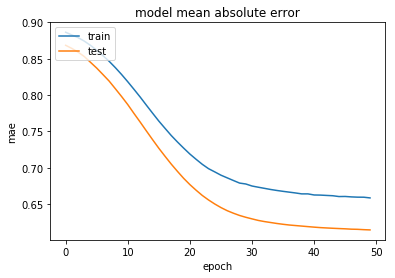

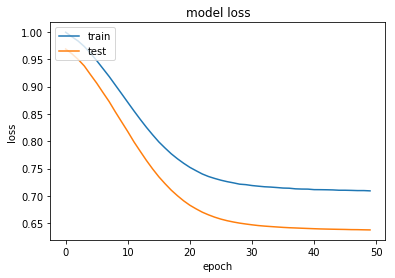

In [20]:
def visualize(history):
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model mean absolute error')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
visualize(history)


In [21]:
model.evaluate(X_test, Y_test)

305/305 [==============================] - 1s 4ms/step


[0.5873698725075018, 0.46557377098036595, 0.5975316823505964]

In [22]:
test = X_test[0] # test = np.array([50 inputs])
# test = (test-mean)/std
# test.reshape(1,50,1)

test.shape

(50, 1)

In [23]:
k = model.predict(np.array([test]))
k = k*std+mean
print("average temperature predicted for next 10 year is",k[0])

average temperature predicted for next 10 year is [ 9.523295 18.146795 14.743913 10.255078  9.523295  9.523295  9.523295
  9.523295  9.523295 10.135762]
